In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data
data = pd.read_csv("Iris.csv")

In [4]:
# the first n rows of the data
data.head(10) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# types of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# calculate descriptive stats
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# number of duplicated data of a certain variable
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
# deleting a column
data = data.drop('Id', axis=1)
# and view again
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


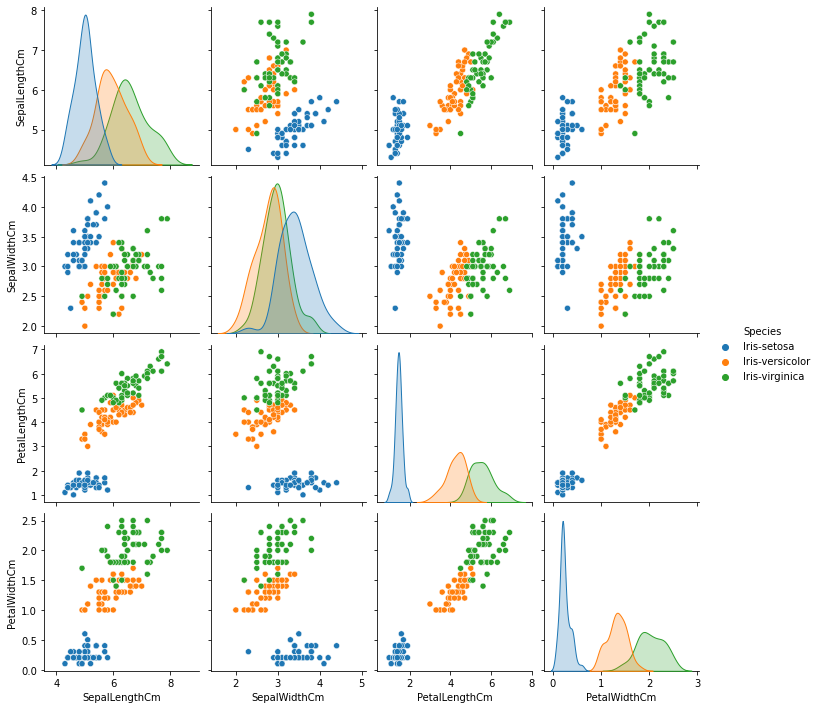

In [9]:
# Data Visualization
# pairplot shows relationship between each attribute based on species
plotting = sns.pairplot(data, hue='Species')

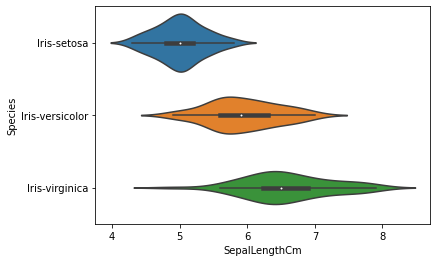

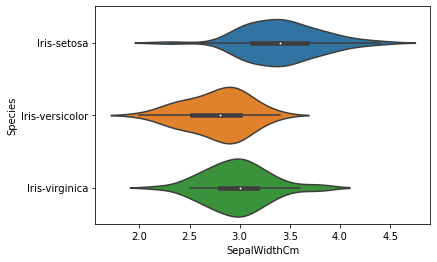

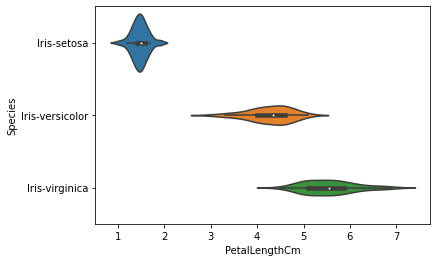

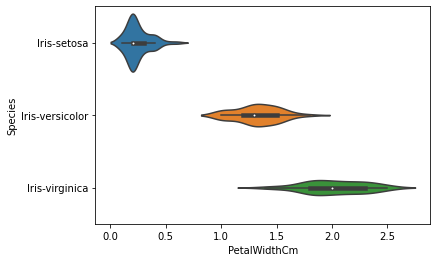

In [10]:
# need to plt.show() after writing code for each graph
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data)
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data)
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data)
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data)

In [11]:
# Feature: length and width of petal & sepal
# Feature dataFrame deletes the species column of data
feature = data.drop(['Species'], axis=1)

# Label: the flower's species
# Label dataFrame only contains the species column of data
label = data['Species']

In [12]:
# Data Splitting
from sklearn.model_selection import train_test_split

In [13]:
# split label and feature data in to training & testing data
# test_size: proportion of whole data used for testing
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.4, random_state=5)

In [14]:
# Classifying Using ML Algorithm: KNN
# KNN uses the number of nearest neighbors to classify items
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [15]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(feature_train, label_train) # fit(): train data
    label_pred = knn.predict(feature_test) # predict(): test data
    scores.append(metrics.accuracy_score(label_test, label_pred)) # compare test data with predicted values

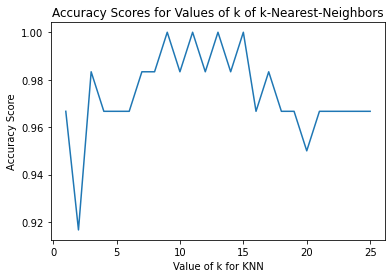

In [16]:
# evaluating best k value
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [17]:
# take the k value of 12, according to the above results

In [18]:
# Classifying Using ML Algorithm: Logistic Regression
from sklearn.linear_model import LogisticRegression 

# predict function for train and test
logreg = LogisticRegression()
logreg.fit(feature_train, label_train)
label_pred = logreg.predict(feature_test)
print(metrics.accuracy_score(label_test, label_pred))

0.9833333333333333


In [19]:
# trying out with random length and width of petal and sepal
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(feature, label)
# sepal length, width; petal length, width
print(knn.predict([[6, 3, 4, 2]]))
print(knn.predict([[10, 9, 5, 4]]))
print(knn.predict([[1, 1, 1, 1]]))

['Iris-versicolor']
['Iris-virginica']
['Iris-setosa']
